# 1. Exploring the dataset

In [5]:
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


casualty_columns = [
    'Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
    'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
    'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
    'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
    'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
    'Casualty_Home_Area_Type'
]
casualties = pd.read_csv("./data/Casualties0515.csv", usecols=casualty_columns)

vehicle_columns = ['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type']
vehicles = pd.read_csv("./data/Vehicles0515.csv", usecols=vehicle_columns)


accidents = pd.read_csv("./data/Accidents0515.csv")


merged_df = pd.merge(casualties, vehicles, on=['Accident_Index', 'Vehicle_Reference'], how='left')


merged_df = pd.merge(merged_df, accidents, on='Accident_Index', how='left')


merged_df.head()


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,1,1,3,1,30,6,3,5,2,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,1,1,1,1,49,8,3,0,0,...,0,0,7,1,2,0,0,1,1,E01002863


In [2]:
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# new Column 'Casualty_IMD_Decile' since 2015 -> reading effects in error "ParserError" because it expects 15 fields but saw 16.

columns_to_read = ['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
                   'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
                   'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
                   'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type', 'Casualty_Home_Area_Type']
casualties = pd.read_csv("./data/Casualties0515.csv", usecols=columns_to_read)

accidents = pd.read_csv("./data/Accidents0515.csv")

merged_df = pd.merge(casualties, accidents, on="Accident_Index", how="left")

merged_df.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,1,1,3,1,30,6,3,5,2,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,1,1,1,1,49,8,3,0,0,...,0,0,7,1,2,0,0,1,1,E01002863


In [3]:
# Data Types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402909 entries, 0 to 2402908
Data columns (total 46 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Vehicle_Reference                            int64  
 2   Casualty_Reference                           int64  
 3   Casualty_Class                               int64  
 4   Sex_of_Casualty                              int64  
 5   Age_of_Casualty                              int64  
 6   Age_Band_of_Casualty                         int64  
 7   Casualty_Severity                            int64  
 8   Pedestrian_Location                          int64  
 9   Pedestrian_Movement                          int64  
 10  Car_Passenger                                int64  
 11  Bus_or_Coach_Passenger                       int64  
 12  Pedestrian_Road_Maintenance_Worker           int64  
 13  Casualty_Typ

In [4]:
# Summary statistics for numerical columns
merged_df.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,...,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06,2.402909e+06
mean,1.485788e+00,1.432161e+00,1.492747e+00,1.415444e+00,3.448799e+01,6.037492e+00,2.866346e+00,6.668663e-01,4.746543e-01,2.807738e-01,...,3.792993e+02,8.644522e-03,7.063701e-01,1.987501e+00,1.571166e+00,1.369152e+00,1.145857e-01,7.343141e-02,1.390118e+00,1.167616e+00
std,6.666494e-01,1.382161e+00,7.068121e-01,4.945461e-01,1.888549e+01,2.405531e+00,3.693695e-01,1.959107e+00,1.660536e+00,5.920908e-01,...,1.300020e+03,1.235180e-01,1.791680e+00,1.681135e+00,1.619461e+00,6.269913e-01,7.460576e-01,6.219985e-01,4.879396e-01,3.794590e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.700000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,9.100000e+01,8.520000e+02,3.000000e+00,2.000000e+00,1.040000e+02,1.100000e+01,3.000000e+00,1.000000e+01,9.000000e+00,2.000000e+00,...,9.999000e+03,2.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00


## 2. Data Preparation

In [9]:
# Count missing values per column
missing = merged_df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

# Replace "Missing-Value" with "Unknown" in Column Weather-Conditions for clearness
merged_df['Weather_Conditions'] = merged_df['Weather_Conditions'].replace(-1, 9)

# All columns we don't need -> drop
columns_to_drop = ['Location_Northing_OSGR', 'Longitude', 'Latitude', 'LSOA_of_Accident_Location', 'Bus_or_Coach_Passenger', 'Location_Easting_OSGR']
merged_df.drop(columns=columns_to_drop, inplace=True)

## 3. Designing CDWH (snowflake schema) and Data Mart (star schema)
### 3.1 CDWH (snowflake schema)

In [2]:

import pandas as pd
import sqlite3

merged_df['Date'] = pd.to_datetime(merged_df['Date'],dayfirst=True, errors='coerce')

print(merged_df.columns)

conn = sqlite3.connect('accidents_dw.db')

dim_date = merged_df[['Date']].drop_duplicates().copy()
dim_date['Date_Key'] = dim_date['Date'].dt.strftime('%Y%m%d').astype(int)
dim_date['Year'] = dim_date['Date'].dt.year
dim_date['Month'] = dim_date['Date'].dt.month
dim_date['Day'] = dim_date['Date'].dt.day
dim_date['Weekday'] = dim_date['Date'].dt.day_name()
dim_date.to_sql('dim_date', conn, if_exists='replace', index=False)

dim_location = merged_df[['Accident_Index', 'Police_Force', 'Road_Type', 'Speed_limit']].drop_duplicates().copy()
dim_location['Location_Key'] = range(1, len(dim_location) + 1)
dim_location.to_sql('dim_location', conn, if_exists='replace', index=False)

dim_weather = merged_df[['Weather_Conditions']].drop_duplicates().copy()
dim_weather['Weather_Key'] = range(1, len(dim_weather) + 1)
dim_weather.to_sql('dim_weather', conn, if_exists='replace', index=False)

dim_vehicle = merged_df[['Vehicle_Type']].drop_duplicates().copy()
dim_vehicle['Vehicle_Key'] = range(1, len(dim_vehicle) + 1)
dim_vehicle.to_sql('dim_vehicle', conn, if_exists='replace', index=False)

dim_casualty = merged_df[['Casualty_Severity']].drop_duplicates().copy()
dim_casualty['Casualty_Key'] = range(1, len(dim_casualty) + 1)
dim_casualty.to_sql('dim_casualty', conn, if_exists='replace', index=False)

fact = merged_df.copy()

fact = fact.merge(dim_date[['Date', 'Date_Key']], on='Date', how='left')
fact = fact.merge(dim_location[['Accident_Index', 'Location_Key']], on='Accident_Index', how='left')
fact = fact.merge(dim_weather[['Weather_Conditions', 'Weather_Key']], on='Weather_Conditions', how='left')
fact = fact.merge(dim_vehicle[['Vehicle_Type', 'Vehicle_Key']], on='Vehicle_Type', how='left')
fact = fact.merge(dim_casualty[['Casualty_Severity', 'Casualty_Key']], on='Casualty_Severity', how='left')

fact_accidents = fact[[
    'Accident_Index',
    'Date_Key',
    'Location_Key',
    'Weather_Key',
    'Vehicle_Key',
    'Casualty_Key',
    'Accident_Severity',
    'Number_of_Casualties',
    'Number_of_Vehicles'
]].drop_duplicates()

fact_accidents.to_sql('fact_accidents', conn, if_exists='replace', index=False)

print("=== dim_date ===")
print(dim_date.head())

print("\n=== dim_location ===")
print(dim_location.head())

print("\n=== dim_weather ===")
print(dim_weather.head())

print("\n=== dim_vehicle ===")
print(dim_vehicle.head())

print("\n=== dim_casualty ===")
print(dim_casualty.head())

print("\n=== fact_accidents ===")
print(fact_accidents.head())

conn.close()


Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Vehicle_Type', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       

#### 3.2 Data Mart (star schema)

In [ ]:
pass

## 4. Formulating analytical questions and performing the analysis

### 4.1 Analytical questions

1. Which times of day have the most accidents?
(Relevance: Identification of peak times for accident prevention.)
2. Which days of the week have the most accidents (Relevance: Identifying high-accident days optimizes resource allocation for enhanced road safety.)
3. How do weather conditions influence the frequency or severity of accidents?
(Relevance: Adaptation of traffic measures in bad weather.)
4. Which geographical areas (e.g. based on police force or urban/rural) have the highest accident rate?
(Relevance: Targeted safety measures in vulnerable areas.)
5. Which roadtype has the most accidents? (Relevance: Pinpointing the top accident-prone road type guides safety upgrades to reduce incidents.)
6. Which age groups has the most casualties in accidents?
(Relevance: Identifying high-risk age groups guides targeted safety education and infrastructure improvements to reduce accident casualties.)

### 4.2 Analysis

#### 4.2.1 Which times of a day have the most accidents?

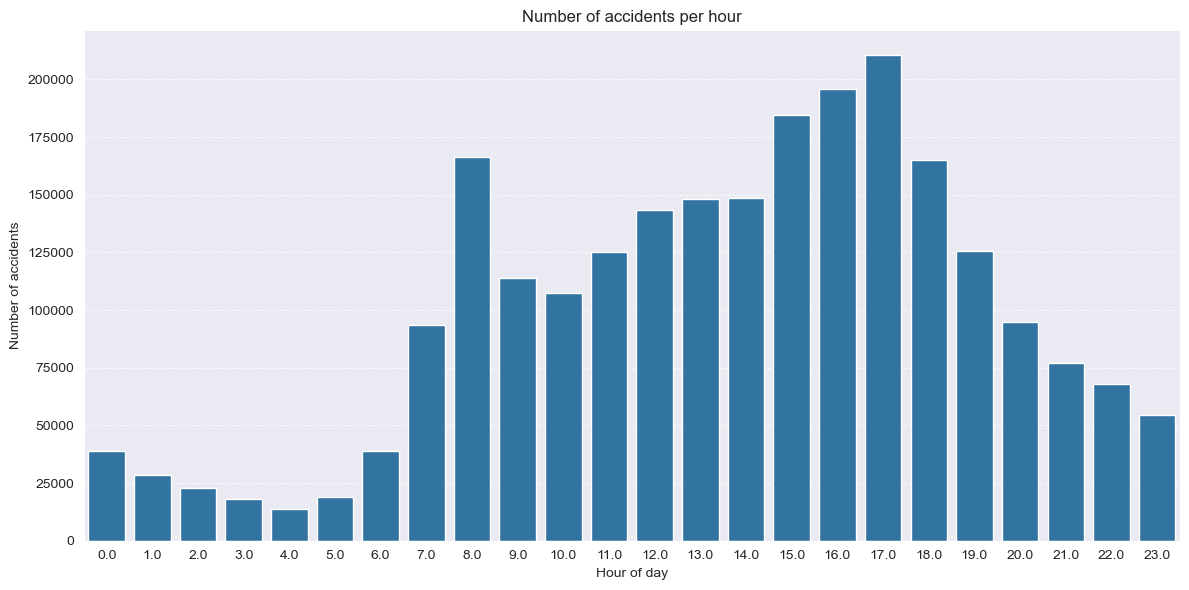

In [4]:
merged_df['Time'] = pd.to_datetime(merged_df['Time'], format='%H:%M', errors='coerce')
merged_df['Hour'] = merged_df['Time'].dt.hour
hourly_counts = merged_df['Hour'].value_counts().sort_index()
hourly_counts


plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.xlabel('Hour of day')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.show()

#### 4.2.2 Which days of the week have the most accidents?

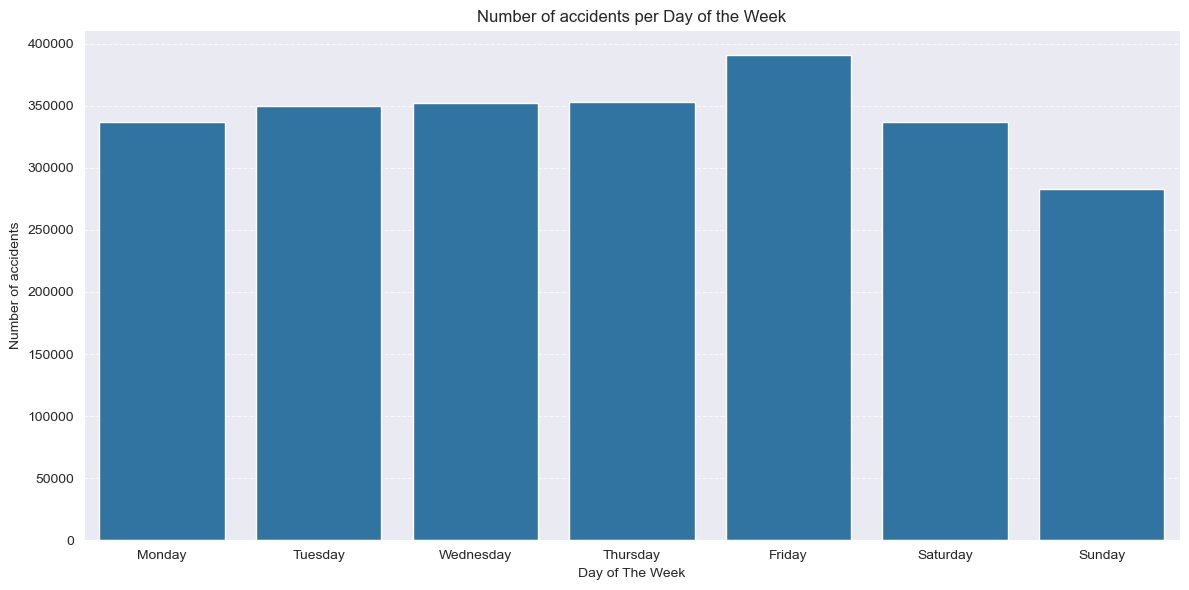

In [3]:
dayOfTheWeek_mapping = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday",
}

merged_df['Day_of_Week_label'] = merged_df['Day_of_Week'].map(dayOfTheWeek_mapping)

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dayOfTheWeek_counts = merged_df['Day_of_Week_label'].value_counts().reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.barplot(x=dayOfTheWeek_counts.index, y=dayOfTheWeek_counts.values)
plt.xlabel('Day of The Week')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.show()

#### 4.2.3 How do weather conditions influence the frequency of accidents?

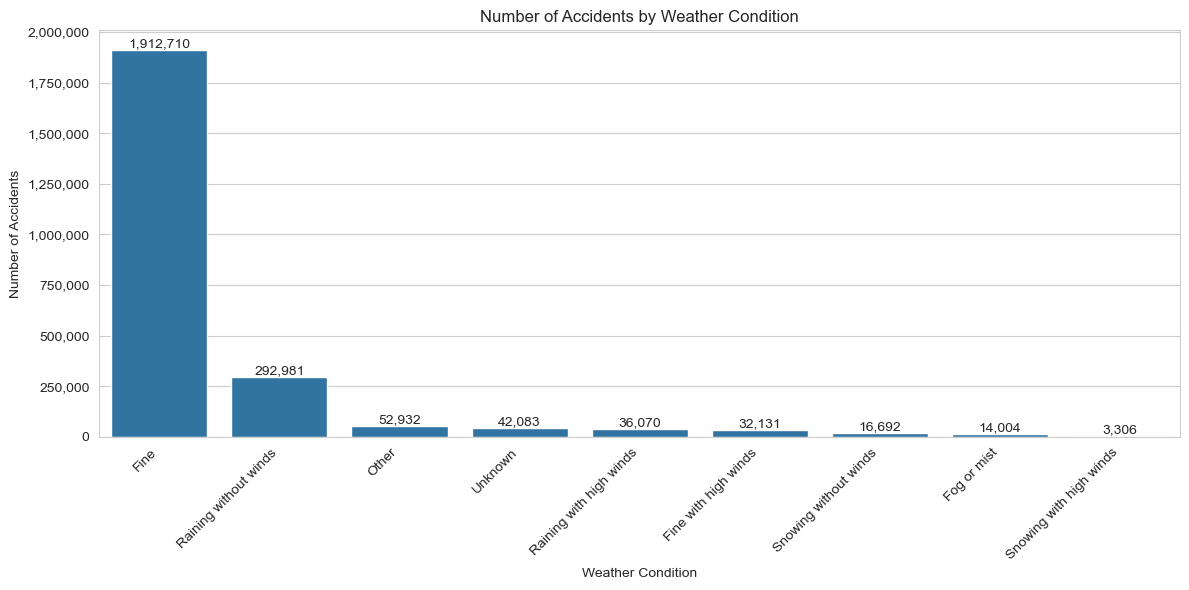

In [13]:
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

weatherConditions_mapping = {
    1: "Fine",
    2: "Raining without winds",
    3: "Snowing without winds",
    4: "Fine with high winds",
    5: "Raining with high winds",
    6: "Snowing with high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown",
}

# Add Weather_Conditions_Label to the original DataFrame
merged_df['Weather_Conditions_Label'] = merged_df['Weather_Conditions'].map(weatherConditions_mapping)

# Group by Weather_Conditions and count accidents
weather_accidents = (merged_df.groupby('Weather_Conditions').size().reset_index(name='Accident_Count'))
weather_accidents['Weather_Conditions_Label'] = weather_accidents['Weather_Conditions'].map(weatherConditions_mapping)

# Sort by Accident_Count in descending order
weather_accidents = weather_accidents.sort_values(by='Accident_Count', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=weather_accidents, x='Weather_Conditions_Label', y='Accident_Count')
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4.2.4 Which geographical areas have the highest accident rate?

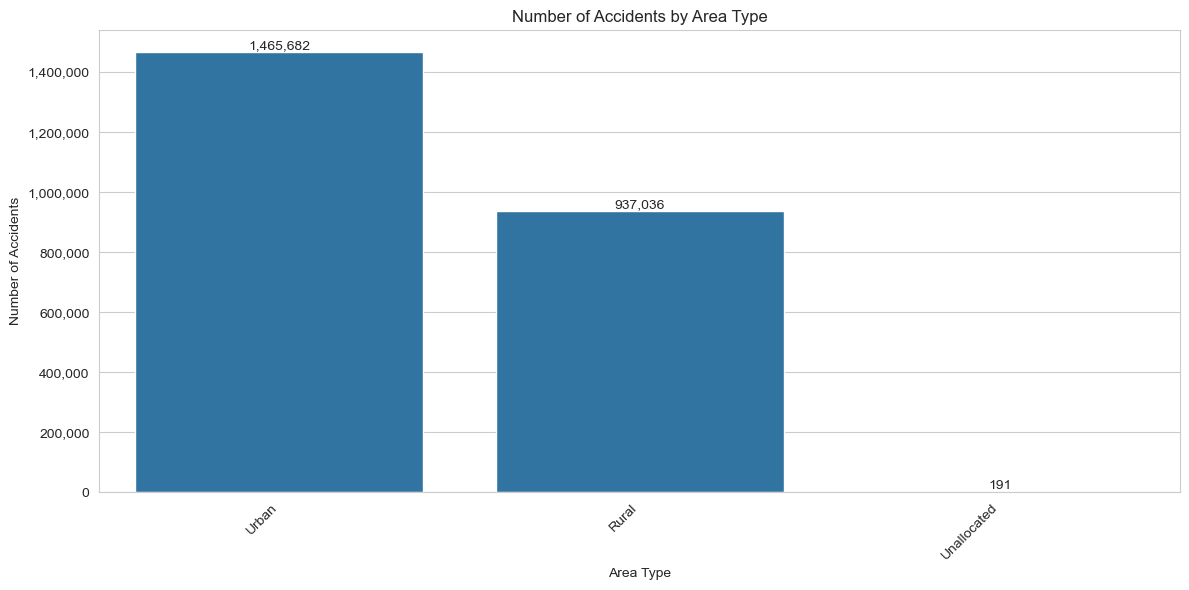

In [18]:
import matplotlib.ticker as mtick

urbanRural_mapping = {
    1: "Urban",
    2: "Rural",
    3: "Unallocated"
}

merged_df['Urban_or_Rural_Label'] = merged_df['Urban_or_Rural_Area'].map(urbanRural_mapping)

area_counts = (merged_df.groupby('Urban_or_Rural_Area').size().reset_index(name='Accident_Count'))
area_counts['Urban_or_Rural_Label'] = area_counts['Urban_or_Rural_Area'].map(urbanRural_mapping)

area_counts = area_counts.sort_values(by='Urban_or_Rural_Area')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=area_counts, x='Urban_or_Rural_Label', y='Accident_Count')

plt.title('Number of Accidents by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 4.2.5 Which roadtype has the most accidents?

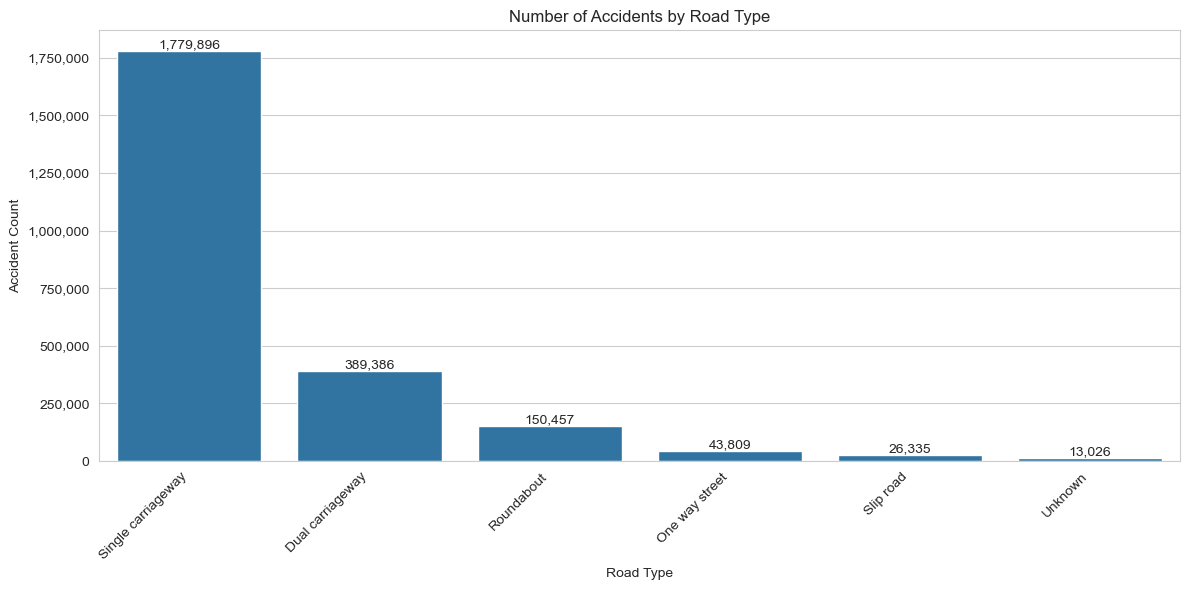

In [20]:
roadtype_mapping = {
    1: "Roundabout",
    2: "One way street",
    3: "Dual carriageway",
    6: "Single carriageway",
    7: "Slip road",
    9: "Unknown",
    12: "One way street/Slip road",
    -1: "Data missing"
}

merged_df['Road_Type_Label'] = merged_df['Road_Type'].map(roadtype_mapping)

roadtype_counts = (merged_df['Road_Type_Label'].value_counts().reset_index())
roadtype_counts.columns = ['Road_Type_Label', 'Accident_Count']


plt.figure(figsize=(12, 6))
ax = sns.barplot(data=roadtype_counts, x='Road_Type_Label', y='Accident_Count')
plt.xlabel('Road Type')
plt.ylabel('Accident Count')
plt.title('Number of Accidents by Road Type')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 4.2.6 Which age groups has the most casualties in accidents?

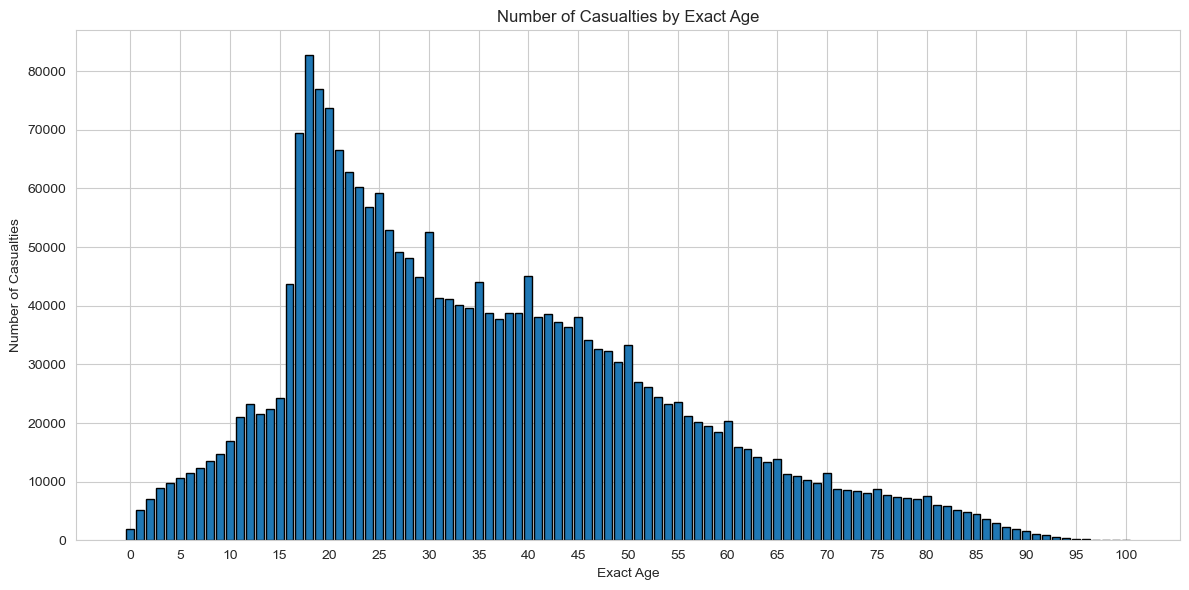

In [21]:
import matplotlib.pyplot as plt

# Count casualties by exact Age_of_Casualty
age_counts = (merged_df['Age_of_Casualty'].value_counts().sort_index().reset_index())
age_counts.columns = ['Age_of_Casualty', 'Casualty_Count']

# Filter out extreme or invalid ages if necessary (e.g., limit to 0-100)
age_counts = age_counts[(age_counts['Age_of_Casualty'] >= 0) & (age_counts['Age_of_Casualty'] <= 100)]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_counts['Age_of_Casualty'], age_counts['Casualty_Count'], edgecolor='black')
plt.xticks(range(0, 101, 5))  # Set x-axis ticks every 5 years for readability
plt.ylabel('Number of Casualties')
plt.xlabel('Exact Age')
plt.title('Number of Casualties by Exact Age')
plt.tight_layout()
plt.show()

## 5. Visualizations

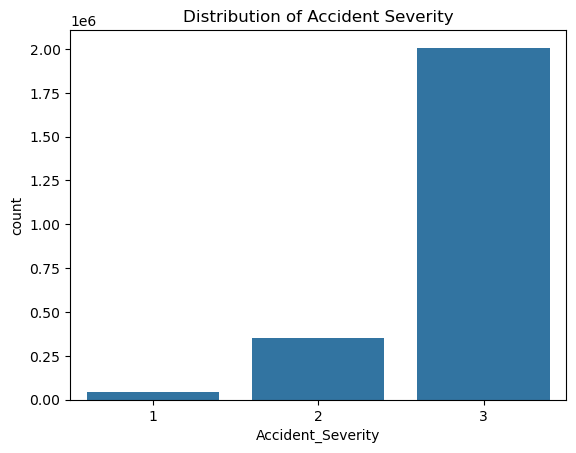

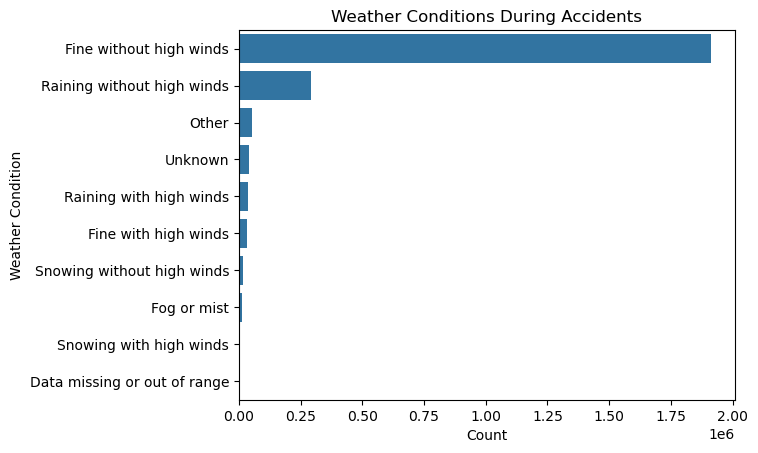

In [55]:
# Accident Severity
sns.countplot(data=merged_df, x='Accident_Severity')
plt.title("Distribution of Accident Severity")
plt.show()

# mapping defined based on official code descriptions for Weather Conditions by UK Department for Transport
weather_mapping = {
    -1: "Data missing or out of range",
    1: "Fine without high winds",
    2: "Raining without high winds",
    3: "Snowing without high winds",
    4: "Fine with high winds",
    5: "Raining with high winds",
    6: "Snowing with high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown"
}

# Apply the mapping
merged_df['Weather_Conditions_Label'] = merged_df['Weather_Conditions'].map(weather_mapping)

sns.countplot(data=merged_df, y='Weather_Conditions_Label', order=merged_df['Weather_Conditions_Label'].value_counts().index)
plt.title("Weather Conditions During Accidents")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()

C:\Users\timsc\AppData\Local\Temp\ipykernel_10396\1541875001.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])


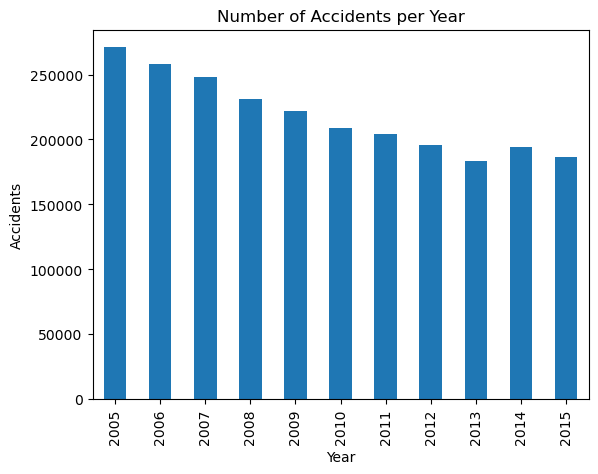

In [56]:
# Convert date column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Accidents over time
merged_df['Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Number of Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Accidents")
plt.show()